# Simple DNN Model

In [1]:
#Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from keras.models import Sequential
from keras.layers import  Dense,Dropout
from keras.models import Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

##### 1)Loading Dataset

In [2]:
df=pd.read_csv("df_Original.csv")
df.head()

,tweet_id,label,text,length,preprocessed_abstract,length_after_cleaning,tokenized_text
0,570306133677760513,2,@VirginAmerica What @dhepburn said.,35,what say,8,"['what', 'say']"
1,570301130888122368,1,@VirginAmerica plus you've added commercials t...,72,plus add commercial experience tacky,36,"['plus', 'add', 'commercial', 'experience', 't..."
2,570301083672813571,2,@VirginAmerica I didn't today... Must mean I n...,71,i today must mean i need take another trip,42,"['i', 'today', 'must', 'mean', 'i', 'need', 't..."
3,570301031407624196,0,@VirginAmerica it's really aggressive to blast...,126,really aggressive blast obnoxious entertainmen...,78,"['really', 'aggressive', 'blast', 'obnoxious',..."
4,570300817074462722,0,@VirginAmerica and it's a really big bad thing...,55,really big bad thing,20,"['really', 'big', 'bad', 'thing']"


In [3]:
df.isnull().sum()

tweet_id                  0
label                     0
text                      0
length                    0
preprocessed_abstract    17
length_after_cleaning     0
tokenized_text            0
dtype: int64

In [4]:
df = df.dropna()

#####  2) Split , into Training and Validation Sets (80:20)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_abstract'], df['label'], test_size=0.2, stratify=df['label'], random_state=42)
print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (11698,) (11698,)
Test data: (2925,) (2925,)


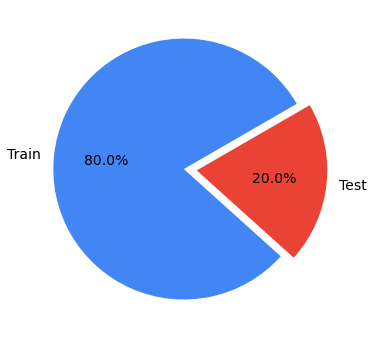

In [6]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len(y_train), len(y_test)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0.05),
        startangle=30);

In [7]:
vect= TfidfVectorizer(min_df=20)
X_train_idf = vect.fit_transform(X_train)
X_test_idf = vect.transform(X_test)

print('X_train_TF-IDF shape: ', X_train_idf.shape)
print('X_test_TF-IDF shape: ', X_test_idf.shape)

X_train_TF-IDF shape:  (11698, 814)
X_test_TF-IDF shape:  (2925, 814)


##### 4)Model Architecture

In [8]:
model = Sequential([
    Dense(8,input_shape=(X_train_idf.shape[1],),kernel_regularizer='l2'),
    Dense(16,activation='relu'),
    Dense(8,activation='relu'),
    Dense(3, activation='softmax')#This is a multi-class Classification problem
    
])
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 6520      
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                                 
Total params: 6827 (26.67 KB)
Trainable params: 6827 (26.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### 5) Training Model

In [10]:
batch_size = 128
epochs = 2000
history=model.fit(X_train_idf.toarray(), y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=1,validation_split=0.2)
history

Epoch 1/2000


74/74 [==============================] - 2s 5ms/step - loss: 1.2501 - accuracy: 0.3879 - val_loss: 1.2475 - val_accuracy: 0.4013
Epoch 2/2000
74/74 [==============================] - 0s 2ms/step - loss: 1.2448 - accuracy: 0.4398 - val_loss: 1.2424 - val_accuracy: 0.4658
Epoch 3/2000
74/74 [==============================] - 0s 2ms/step - loss: 1.2397 - accuracy: 0.4878 - val_loss: 1.2372 - val_accuracy: 0.5248
Epoch 4/2000
74/74 [==============================] - 0s 2ms/step - loss: 1.2345 - accuracy: 0.5384 - val_loss: 1.2320 - val_accuracy: 0.5679
Epoch 5/2000
74/74 [==============================] - 0s 2ms/step - loss: 1.2294 - accuracy: 0.5734 - val_loss: 1.2269 - val_accuracy: 0.5893
Epoch 6/2000
74/74 [==============================] - 0s 2ms/step - loss: 1.2243 - accuracy: 0.5959 - val_loss: 1.2217 - val_accuracy: 0.6026
Epoch 7/2000
74/74 [==============================] - 0s 2ms/step - loss: 1.2191 - accuracy: 0.6117 - val_loss: 1.2166 - val_accuracy: 0.6145
Epoc

74/74 [==============================] - 0s 2ms/step - loss: 0.9786 - accuracy: 0.6278 - val_loss: 0.9799 - val_accuracy: 0.6256
Epoch 56/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.9748 - accuracy: 0.6278 - val_loss: 0.9762 - val_accuracy: 0.6256
Epoch 57/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.9711 - accuracy: 0.6278 - val_loss: 0.9727 - val_accuracy: 0.6256
Epoch 58/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.9674 - accuracy: 0.6278 - val_loss: 0.9692 - val_accuracy: 0.6256
Epoch 59/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.9639 - accuracy: 0.6278 - val_loss: 0.9658 - val_accuracy: 0.6256
Epoch 60/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.9604 - accuracy: 0.6278 - val_loss: 0.9625 - val_accuracy: 0.6256
Epoch 61/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.9570 - accuracy: 0.6278 - val_loss: 0.9593 - val_accuracy: 0.6256
Epoch 62/2000

74/74 [==============================] - 0s 2ms/step - loss: 0.8655 - accuracy: 0.6278 - val_loss: 0.8744 - val_accuracy: 0.6256
Epoch 113/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.8644 - accuracy: 0.6278 - val_loss: 0.8734 - val_accuracy: 0.6256
Epoch 114/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.8633 - accuracy: 0.6278 - val_loss: 0.8724 - val_accuracy: 0.6256
Epoch 115/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.8622 - accuracy: 0.6278 - val_loss: 0.8714 - val_accuracy: 0.6256
Epoch 116/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.8611 - accuracy: 0.6278 - val_loss: 0.8704 - val_accuracy: 0.6256
Epoch 117/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.8599 - accuracy: 0.6278 - val_loss: 0.8694 - val_accuracy: 0.6256
Epoch 118/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.8588 - accuracy: 0.6278 - val_loss: 0.8684 - val_accuracy: 0.6256
Epoch 1

Epoch 169/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.8016 - accuracy: 0.6278 - val_loss: 0.8205 - val_accuracy: 0.6256
Epoch 170/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.8005 - accuracy: 0.6278 - val_loss: 0.8197 - val_accuracy: 0.6256
Epoch 171/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7995 - accuracy: 0.6278 - val_loss: 0.8188 - val_accuracy: 0.6256
Epoch 172/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7984 - accuracy: 0.6278 - val_loss: 0.8180 - val_accuracy: 0.6256
Epoch 173/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7973 - accuracy: 0.6278 - val_loss: 0.8171 - val_accuracy: 0.6256
Epoch 174/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7963 - accuracy: 0.6278 - val_loss: 0.8163 - val_accuracy: 0.6256
Epoch 175/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7953 - accuracy: 0.6278 - val_loss: 0.8155 - val_accuracy:

Epoch 226/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7476 - accuracy: 0.6537 - val_loss: 0.7787 - val_accuracy: 0.6543
Epoch 227/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7468 - accuracy: 0.6585 - val_loss: 0.7781 - val_accuracy: 0.6581
Epoch 228/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7460 - accuracy: 0.6736 - val_loss: 0.7776 - val_accuracy: 0.6688
Epoch 229/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7453 - accuracy: 0.6748 - val_loss: 0.7770 - val_accuracy: 0.6692
Epoch 230/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7446 - accuracy: 0.6764 - val_loss: 0.7764 - val_accuracy: 0.6697
Epoch 231/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7438 - accuracy: 0.6777 - val_loss: 0.7759 - val_accuracy: 0.6709
Epoch 232/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7431 - accuracy: 0.6788 - val_loss: 0.7753 - val_accuracy:

Epoch 283/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7116 - accuracy: 0.7110 - val_loss: 0.7522 - val_accuracy: 0.6957
Epoch 284/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7111 - accuracy: 0.7108 - val_loss: 0.7519 - val_accuracy: 0.6957
Epoch 285/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7106 - accuracy: 0.7113 - val_loss: 0.7515 - val_accuracy: 0.6957
Epoch 286/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7100 - accuracy: 0.7113 - val_loss: 0.7511 - val_accuracy: 0.6953
Epoch 287/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7095 - accuracy: 0.7115 - val_loss: 0.7508 - val_accuracy: 0.6957
Epoch 288/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7090 - accuracy: 0.7115 - val_loss: 0.7504 - val_accuracy: 0.6953
Epoch 289/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.7085 - accuracy: 0.7119 - val_loss: 0.7500 - val_accuracy:

Epoch 340/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.7368 - val_loss: 0.7324 - val_accuracy: 0.7132
Epoch 341/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.7370 - val_loss: 0.7321 - val_accuracy: 0.7132
Epoch 342/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.7379 - val_loss: 0.7318 - val_accuracy: 0.7141
Epoch 343/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.7380 - val_loss: 0.7315 - val_accuracy: 0.7141
Epoch 344/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.7380 - val_loss: 0.7312 - val_accuracy: 0.7145
Epoch 345/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.7387 - val_loss: 0.7309 - val_accuracy: 0.7150
Epoch 346/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.7387 - val_loss: 0.7306 - val_accuracy:

Epoch 397/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.7559 - val_loss: 0.7171 - val_accuracy: 0.7235
Epoch 398/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.7566 - val_loss: 0.7169 - val_accuracy: 0.7235
Epoch 399/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.7575 - val_loss: 0.7166 - val_accuracy: 0.7235
Epoch 400/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.7574 - val_loss: 0.7164 - val_accuracy: 0.7235
Epoch 401/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.7580 - val_loss: 0.7162 - val_accuracy: 0.7239
Epoch 402/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.7581 - val_loss: 0.7160 - val_accuracy: 0.7239
Epoch 403/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.7580 - val_loss: 0.7158 - val_accuracy:

Epoch 454/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.7700 - val_loss: 0.7045 - val_accuracy: 0.7282
Epoch 455/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.7705 - val_loss: 0.7043 - val_accuracy: 0.7282
Epoch 456/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.7704 - val_loss: 0.7041 - val_accuracy: 0.7282
Epoch 457/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.7705 - val_loss: 0.7040 - val_accuracy: 0.7282
Epoch 458/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.7708 - val_loss: 0.7038 - val_accuracy: 0.7282
Epoch 459/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.7711 - val_loss: 0.7035 - val_accuracy: 0.7286
Epoch 460/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.7708 - val_loss: 0.7033 - val_accuracy:

Epoch 511/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6199 - accuracy: 0.7830 - val_loss: 0.6933 - val_accuracy: 0.7397
Epoch 512/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6196 - accuracy: 0.7829 - val_loss: 0.6931 - val_accuracy: 0.7406
Epoch 513/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.7832 - val_loss: 0.6929 - val_accuracy: 0.7397
Epoch 514/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.7835 - val_loss: 0.6927 - val_accuracy: 0.7397
Epoch 515/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 0.7835 - val_loss: 0.6926 - val_accuracy: 0.7397
Epoch 516/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6183 - accuracy: 0.7840 - val_loss: 0.6923 - val_accuracy: 0.7393
Epoch 517/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.7836 - val_loss: 0.6921 - val_accuracy:

Epoch 568/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.7925 - val_loss: 0.6824 - val_accuracy: 0.7427
Epoch 569/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.7927 - val_loss: 0.6822 - val_accuracy: 0.7427
Epoch 570/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.7928 - val_loss: 0.6819 - val_accuracy: 0.7427
Epoch 571/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.7926 - val_loss: 0.6819 - val_accuracy: 0.7436
Epoch 572/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.7925 - val_loss: 0.6817 - val_accuracy: 0.7440
Epoch 573/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.7928 - val_loss: 0.6815 - val_accuracy: 0.7440
Epoch 574/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5993 - accuracy: 0.7931 - val_loss: 0.6812 - val_accuracy:

Epoch 625/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.8007 - val_loss: 0.6713 - val_accuracy: 0.7504
Epoch 626/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.8013 - val_loss: 0.6711 - val_accuracy: 0.7500
Epoch 627/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.8010 - val_loss: 0.6709 - val_accuracy: 0.7504
Epoch 628/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.8015 - val_loss: 0.6707 - val_accuracy: 0.7500
Epoch 629/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.8016 - val_loss: 0.6705 - val_accuracy: 0.7504
Epoch 630/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.8021 - val_loss: 0.6704 - val_accuracy: 0.7504
Epoch 631/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.8019 - val_loss: 0.6701 - val_accuracy:

Epoch 682/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.8081 - val_loss: 0.6606 - val_accuracy: 0.7551
Epoch 683/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5645 - accuracy: 0.8088 - val_loss: 0.6604 - val_accuracy: 0.7556
Epoch 684/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.8095 - val_loss: 0.6601 - val_accuracy: 0.7560
Epoch 685/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5639 - accuracy: 0.8095 - val_loss: 0.6600 - val_accuracy: 0.7560
Epoch 686/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.8096 - val_loss: 0.6598 - val_accuracy: 0.7556
Epoch 687/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5633 - accuracy: 0.8095 - val_loss: 0.6597 - val_accuracy: 0.7556
Epoch 688/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.8099 - val_loss: 0.6595 - val_accuracy:

Epoch 739/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5476 - accuracy: 0.8127 - val_loss: 0.6503 - val_accuracy: 0.7607
Epoch 740/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5473 - accuracy: 0.8130 - val_loss: 0.6502 - val_accuracy: 0.7607
Epoch 741/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.8129 - val_loss: 0.6500 - val_accuracy: 0.7611
Epoch 742/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.8137 - val_loss: 0.6497 - val_accuracy: 0.7615
Epoch 743/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5464 - accuracy: 0.8135 - val_loss: 0.6496 - val_accuracy: 0.7615
Epoch 744/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.8141 - val_loss: 0.6494 - val_accuracy: 0.7611
Epoch 745/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5458 - accuracy: 0.8148 - val_loss: 0.6493 - val_accuracy:

Epoch 796/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5318 - accuracy: 0.8171 - val_loss: 0.6419 - val_accuracy: 0.7632
Epoch 797/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.8173 - val_loss: 0.6417 - val_accuracy: 0.7632
Epoch 798/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.8171 - val_loss: 0.6416 - val_accuracy: 0.7632
Epoch 799/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5310 - accuracy: 0.8174 - val_loss: 0.6414 - val_accuracy: 0.7628
Epoch 800/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.8174 - val_loss: 0.6413 - val_accuracy: 0.7632
Epoch 801/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5305 - accuracy: 0.8176 - val_loss: 0.6412 - val_accuracy: 0.7637
Epoch 802/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.8176 - val_loss: 0.6411 - val_accuracy:

Epoch 853/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5178 - accuracy: 0.8182 - val_loss: 0.6351 - val_accuracy: 0.7637
Epoch 854/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.8184 - val_loss: 0.6349 - val_accuracy: 0.7641
Epoch 855/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.8187 - val_loss: 0.6348 - val_accuracy: 0.7632
Epoch 856/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5172 - accuracy: 0.8186 - val_loss: 0.6347 - val_accuracy: 0.7628
Epoch 857/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.8186 - val_loss: 0.6346 - val_accuracy: 0.7628
Epoch 858/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.8186 - val_loss: 0.6345 - val_accuracy: 0.7628
Epoch 859/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.8189 - val_loss: 0.6345 - val_accuracy:

Epoch 910/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.8208 - val_loss: 0.6305 - val_accuracy: 0.7632
Epoch 911/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.8203 - val_loss: 0.6305 - val_accuracy: 0.7632
Epoch 912/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.8206 - val_loss: 0.6304 - val_accuracy: 0.7628
Epoch 913/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.8207 - val_loss: 0.6303 - val_accuracy: 0.7632
Epoch 914/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5054 - accuracy: 0.8205 - val_loss: 0.6304 - val_accuracy: 0.7628
Epoch 915/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.8206 - val_loss: 0.6303 - val_accuracy: 0.7632
Epoch 916/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.8207 - val_loss: 0.6302 - val_accuracy:

Epoch 967/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.8210 - val_loss: 0.6274 - val_accuracy: 0.7628
Epoch 968/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.8210 - val_loss: 0.6275 - val_accuracy: 0.7628
Epoch 969/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.8208 - val_loss: 0.6273 - val_accuracy: 0.7624
Epoch 970/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.8209 - val_loss: 0.6273 - val_accuracy: 0.7628
Epoch 971/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.8211 - val_loss: 0.6273 - val_accuracy: 0.7637
Epoch 972/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.8205 - val_loss: 0.6272 - val_accuracy: 0.7637
Epoch 973/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.8209 - val_loss: 0.6273 - val_accuracy:

Epoch 1024/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4882 - accuracy: 0.8228 - val_loss: 0.6259 - val_accuracy: 0.7658
Epoch 1025/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.8227 - val_loss: 0.6259 - val_accuracy: 0.7650
Epoch 1026/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.8223 - val_loss: 0.6258 - val_accuracy: 0.7645
Epoch 1027/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.8227 - val_loss: 0.6258 - val_accuracy: 0.7645
Epoch 1028/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.8229 - val_loss: 0.6258 - val_accuracy: 0.7645
Epoch 1029/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.8228 - val_loss: 0.6258 - val_accuracy: 0.7645
Epoch 1030/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.8227 - val_loss: 0.6258 - val_ac

74/74 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.8237 - val_loss: 0.6255 - val_accuracy: 0.7632
Epoch 1081/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.8239 - val_loss: 0.6255 - val_accuracy: 0.7624
Epoch 1082/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.8231 - val_loss: 0.6255 - val_accuracy: 0.7632
Epoch 1083/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.8236 - val_loss: 0.6255 - val_accuracy: 0.7624
Epoch 1084/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.8239 - val_loss: 0.6254 - val_accuracy: 0.7624
Epoch 1085/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.8246 - val_loss: 0.6254 - val_accuracy: 0.7628
Epoch 1086/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.8245 - val_loss: 0.6253 - val_accuracy: 0.7624
E

74/74 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.8259 - val_loss: 0.6256 - val_accuracy: 0.7590
Epoch 1137/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.8261 - val_loss: 0.6256 - val_accuracy: 0.7594
Epoch 1138/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.8254 - val_loss: 0.6255 - val_accuracy: 0.7585
Epoch 1139/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.8260 - val_loss: 0.6255 - val_accuracy: 0.7590
Epoch 1140/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.8264 - val_loss: 0.6255 - val_accuracy: 0.7585
Epoch 1141/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.8264 - val_loss: 0.6256 - val_accuracy: 0.7585
Epoch 1142/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.8265 - val_loss: 0.6256 - val_accuracy: 0.7585
E

74/74 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.8271 - val_loss: 0.6263 - val_accuracy: 0.7594
Epoch 1193/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.8273 - val_loss: 0.6263 - val_accuracy: 0.7594
Epoch 1194/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.8272 - val_loss: 0.6263 - val_accuracy: 0.7594
Epoch 1195/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.8273 - val_loss: 0.6264 - val_accuracy: 0.7590
Epoch 1196/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.8273 - val_loss: 0.6263 - val_accuracy: 0.7590
Epoch 1197/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.8276 - val_loss: 0.6264 - val_accuracy: 0.7590
Epoch 1198/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.8272 - val_loss: 0.6263 - val_accuracy: 0.7590
E

74/74 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.8276 - val_loss: 0.6271 - val_accuracy: 0.7568
Epoch 1249/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.8276 - val_loss: 0.6271 - val_accuracy: 0.7573
Epoch 1250/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.8276 - val_loss: 0.6272 - val_accuracy: 0.7573
Epoch 1251/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.8278 - val_loss: 0.6272 - val_accuracy: 0.7573
Epoch 1252/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.8280 - val_loss: 0.6273 - val_accuracy: 0.7581
Epoch 1253/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.8277 - val_loss: 0.6273 - val_accuracy: 0.7577
Epoch 1254/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4678 - accuracy: 0.8280 - val_loss: 0.6274 - val_accuracy: 0.7577
E

74/74 [==============================] - 0s 2ms/step - loss: 0.4648 - accuracy: 0.8283 - val_loss: 0.6283 - val_accuracy: 0.7585
Epoch 1305/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4648 - accuracy: 0.8284 - val_loss: 0.6284 - val_accuracy: 0.7590
Epoch 1306/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.8282 - val_loss: 0.6285 - val_accuracy: 0.7590
Epoch 1307/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.8286 - val_loss: 0.6285 - val_accuracy: 0.7598
Epoch 1308/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.8284 - val_loss: 0.6285 - val_accuracy: 0.7590
Epoch 1309/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.8283 - val_loss: 0.6285 - val_accuracy: 0.7585
Epoch 1310/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.8285 - val_loss: 0.6286 - val_accuracy: 0.7594
E

74/74 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.8291 - val_loss: 0.6296 - val_accuracy: 0.7590
Epoch 1361/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.8287 - val_loss: 0.6297 - val_accuracy: 0.7594
Epoch 1362/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.8290 - val_loss: 0.6297 - val_accuracy: 0.7594
Epoch 1363/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.8287 - val_loss: 0.6296 - val_accuracy: 0.7594
Epoch 1364/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.8289 - val_loss: 0.6297 - val_accuracy: 0.7590
Epoch 1365/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.8291 - val_loss: 0.6298 - val_accuracy: 0.7581
Epoch 1366/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.8292 - val_loss: 0.6298 - val_accuracy: 0.7581
E

74/74 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.8296 - val_loss: 0.6306 - val_accuracy: 0.7564
Epoch 1417/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4592 - accuracy: 0.8295 - val_loss: 0.6307 - val_accuracy: 0.7564
Epoch 1418/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4592 - accuracy: 0.8299 - val_loss: 0.6307 - val_accuracy: 0.7564
Epoch 1419/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.8298 - val_loss: 0.6307 - val_accuracy: 0.7564
Epoch 1420/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.8302 - val_loss: 0.6307 - val_accuracy: 0.7564
Epoch 1421/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.8304 - val_loss: 0.6308 - val_accuracy: 0.7560
Epoch 1422/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.8302 - val_loss: 0.6308 - val_accuracy: 0.7560
E

74/74 [==============================] - 0s 3ms/step - loss: 0.4569 - accuracy: 0.8307 - val_loss: 0.6319 - val_accuracy: 0.7568
Epoch 1473/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.8307 - val_loss: 0.6320 - val_accuracy: 0.7568
Epoch 1474/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.8306 - val_loss: 0.6320 - val_accuracy: 0.7568
Epoch 1475/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.8309 - val_loss: 0.6321 - val_accuracy: 0.7568
Epoch 1476/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.8311 - val_loss: 0.6321 - val_accuracy: 0.7568
Epoch 1477/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.8312 - val_loss: 0.6321 - val_accuracy: 0.7568
Epoch 1478/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.8311 - val_loss: 0.6321 - val_accuracy: 0.7568
E

74/74 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.8316 - val_loss: 0.6333 - val_accuracy: 0.7560
Epoch 1529/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.8313 - val_loss: 0.6332 - val_accuracy: 0.7573
Epoch 1530/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.8315 - val_loss: 0.6333 - val_accuracy: 0.7564
Epoch 1531/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.8315 - val_loss: 0.6333 - val_accuracy: 0.7564
Epoch 1532/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.8311 - val_loss: 0.6334 - val_accuracy: 0.7560
Epoch 1533/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.8311 - val_loss: 0.6335 - val_accuracy: 0.7560
Epoch 1534/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.8319 - val_loss: 0.6335 - val_accuracy: 0.7568
E

74/74 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.8316 - val_loss: 0.6345 - val_accuracy: 0.7560
Epoch 1585/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.8314 - val_loss: 0.6347 - val_accuracy: 0.7564
Epoch 1586/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.8309 - val_loss: 0.6347 - val_accuracy: 0.7573
Epoch 1587/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.8315 - val_loss: 0.6347 - val_accuracy: 0.7564
Epoch 1588/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.8309 - val_loss: 0.6347 - val_accuracy: 0.7564
Epoch 1589/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.8314 - val_loss: 0.6347 - val_accuracy: 0.7564
Epoch 1590/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.8315 - val_loss: 0.6348 - val_accuracy: 0.7573
E

74/74 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.8323 - val_loss: 0.6358 - val_accuracy: 0.7577
Epoch 1641/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.8321 - val_loss: 0.6359 - val_accuracy: 0.7568
Epoch 1642/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.8321 - val_loss: 0.6358 - val_accuracy: 0.7573
Epoch 1643/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.8322 - val_loss: 0.6358 - val_accuracy: 0.7573
Epoch 1644/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.8323 - val_loss: 0.6359 - val_accuracy: 0.7577
Epoch 1645/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.8328 - val_loss: 0.6359 - val_accuracy: 0.7577
Epoch 1646/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.8327 - val_loss: 0.6359 - val_accuracy: 0.7577
E

74/74 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.8327 - val_loss: 0.6369 - val_accuracy: 0.7568
Epoch 1697/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.8329 - val_loss: 0.6369 - val_accuracy: 0.7568
Epoch 1698/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8330 - val_loss: 0.6371 - val_accuracy: 0.7573
Epoch 1699/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8327 - val_loss: 0.6371 - val_accuracy: 0.7573
Epoch 1700/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8330 - val_loss: 0.6371 - val_accuracy: 0.7568
Epoch 1701/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.8327 - val_loss: 0.6371 - val_accuracy: 0.7577
Epoch 1702/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.8333 - val_loss: 0.6371 - val_accuracy: 0.7573
E

74/74 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.8334 - val_loss: 0.6382 - val_accuracy: 0.7573
Epoch 1753/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.8331 - val_loss: 0.6382 - val_accuracy: 0.7577
Epoch 1754/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.8335 - val_loss: 0.6383 - val_accuracy: 0.7577
Epoch 1755/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.8332 - val_loss: 0.6383 - val_accuracy: 0.7573
Epoch 1756/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.8329 - val_loss: 0.6384 - val_accuracy: 0.7568
Epoch 1757/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.8333 - val_loss: 0.6384 - val_accuracy: 0.7577
Epoch 1758/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.8338 - val_loss: 0.6384 - val_accuracy: 0.7577
E

74/74 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.8332 - val_loss: 0.6394 - val_accuracy: 0.7573
Epoch 1809/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.8331 - val_loss: 0.6394 - val_accuracy: 0.7577
Epoch 1810/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.8331 - val_loss: 0.6395 - val_accuracy: 0.7577
Epoch 1811/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.8333 - val_loss: 0.6396 - val_accuracy: 0.7573
Epoch 1812/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8329 - val_loss: 0.6396 - val_accuracy: 0.7581
Epoch 1813/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8333 - val_loss: 0.6396 - val_accuracy: 0.7581
Epoch 1814/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8334 - val_loss: 0.6396 - val_accuracy: 0.7577
E

74/74 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.8336 - val_loss: 0.6406 - val_accuracy: 0.7573
Epoch 1865/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.8332 - val_loss: 0.6406 - val_accuracy: 0.7573
Epoch 1866/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.8331 - val_loss: 0.6406 - val_accuracy: 0.7573
Epoch 1867/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.8328 - val_loss: 0.6406 - val_accuracy: 0.7573
Epoch 1868/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.8334 - val_loss: 0.6407 - val_accuracy: 0.7573
Epoch 1869/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.8329 - val_loss: 0.6407 - val_accuracy: 0.7573
Epoch 1870/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.8331 - val_loss: 0.6407 - val_accuracy: 0.7573
E

74/74 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8332 - val_loss: 0.6412 - val_accuracy: 0.7551
Epoch 1921/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8332 - val_loss: 0.6413 - val_accuracy: 0.7556
Epoch 1922/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8334 - val_loss: 0.6413 - val_accuracy: 0.7560
Epoch 1923/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8332 - val_loss: 0.6413 - val_accuracy: 0.7568
Epoch 1924/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8332 - val_loss: 0.6414 - val_accuracy: 0.7564
Epoch 1925/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.8330 - val_loss: 0.6414 - val_accuracy: 0.7564
Epoch 1926/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.8328 - val_loss: 0.6415 - val_accuracy: 0.7556
E

74/74 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8334 - val_loss: 0.6423 - val_accuracy: 0.7560
Epoch 1977/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8333 - val_loss: 0.6424 - val_accuracy: 0.7560
Epoch 1978/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8335 - val_loss: 0.6423 - val_accuracy: 0.7564
Epoch 1979/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8335 - val_loss: 0.6424 - val_accuracy: 0.7564
Epoch 1980/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8336 - val_loss: 0.6423 - val_accuracy: 0.7568
Epoch 1981/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8335 - val_loss: 0.6424 - val_accuracy: 0.7564
Epoch 1982/2000
74/74 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8333 - val_loss: 0.6424 - val_accuracy: 0.7564
E

##### 6) Finding Training and Testing Accuracy

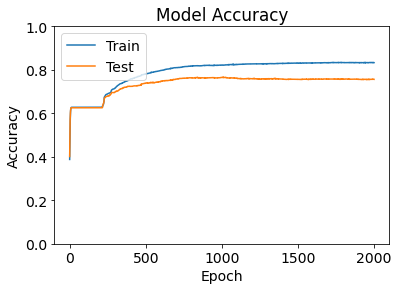

In [11]:
# Plot the training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
test_loss,test_acc=model.evaluate(X_test_idf.toarray(),y_test)
print(f'Test Accuracy: {test_acc} and Test Loss: {test_loss}')

92/92 [==============================] - 0s 1ms/step - loss: 0.6189 - accuracy: 0.7699
Test Accuracy: 0.7699145078659058 and Test Loss: 0.6188592314720154


##### 7) Compute and plot the confusion matrix for the three classes

In [13]:
predictions=model.predict(X_test_idf.toarray())
class_labels = ['negative', 'positive','neutral']
predicted_class_labels = [class_labels[np.argmax(pred)] for pred in predictions]
actual_class_labels=[class_labels[actual] for actual in y_test]
print(classification_report(actual_class_labels, predicted_class_labels))

92/92 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

    negative       0.84      0.87      0.85      1835
     neutral       0.60      0.57      0.58       617
    positive       0.71      0.63      0.67       473

    accuracy                           0.77      2925
   macro avg       0.71      0.69      0.70      2925
weighted avg       0.77      0.77      0.77      2925



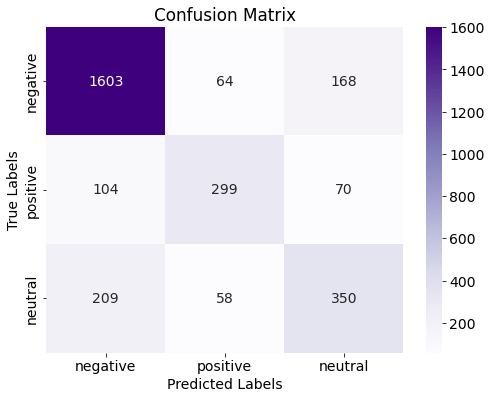

In [14]:
conf_matrix = confusion_matrix(actual_class_labels, predicted_class_labels, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

##### 8) Saving the final results in Excel sheet

In [15]:
precision_per_class = precision_score(actual_class_labels, predicted_class_labels, average=None)
recall_per_class = recall_score(actual_class_labels, predicted_class_labels, average=None)

print("Precision per class:", precision_per_class)
print("Recall per class:", recall_per_class)

Precision per class: [0.83663883 0.5952381  0.71021378]
Recall per class: [0.87356948 0.56726094 0.63213531]


In [16]:
f1_micro = f1_score(actual_class_labels, predicted_class_labels, average='micro')
f1_macro = f1_score(actual_class_labels, predicted_class_labels, average='macro')

print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)

Micro F1 Score: 0.7699145299145299
Macro F1 Score: 0.701507359364231


In [19]:
data={'Original_Dataset':[max(history.history['accuracy']),test_acc,f1_micro,f1_macro,precision_per_class[0],precision_per_class[1],precision_per_class[2],recall_per_class[0],recall_per_class[1],recall_per_class[2]]}
result=pd.DataFrame(data,index=['Training Accuracy','Testing Accuracy','Micro F1 Score','Macro F1 Score','Precision for Negative sentiment','Precision for Positive sentiment','Precision for Neutral sentiment','Recall for Negative sentiment','Recall for Positive sentiment','Recall for Neutral sentiment'])
result

,Original_Dataset
Training Accuracy,0.834259
Testing Accuracy,0.769915
Micro F1 Score,0.769915
Macro F1 Score,0.701507
Precision for Negative sentiment,0.836639
Precision for Positive sentiment,0.595238
Precision for Neutral sentiment,0.710214
Recall for Negative sentiment,0.873569
Recall for Positive sentiment,0.567261
Recall for Neutral sentiment,0.632135


In [20]:
result.to_csv('SimpleDNNModelResults.csv', index=True)